<a href="https://colab.research.google.com/github/manvendra-07/DL-Lab/blob/main/200968146_DL_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow.keras.optimizers as optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Import the dataset

In [2]:
bodyfat = pd.read_csv('bodyfat.csv')
bodyfat.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## Scaling the data using MinMaxScaler

In [3]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(bodyfat)
bodyfat_scaled = pd.DataFrame(scaled_features, index=bodyfat.index, columns=bodyfat.columns)
bodyfat_scaled.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,0.665496,0.258947,0.016949,0.146127,0.792746,0.253731,0.242531,0.200762,0.151515,0.294264,0.267081,0.189189,0.356436,0.460432,0.232143
1,0.792801,0.128421,0.000000,0.223789,0.886010,0.368159,0.251318,0.172808,0.218501,0.286783,0.267081,0.290541,0.282178,0.568345,0.428571
2,0.407375,0.532632,0.000000,0.145105,0.761658,0.144279,0.289982,0.235070,0.226475,0.309227,0.366460,0.331081,0.198020,0.302158,0.142857
3,0.703248,0.218947,0.067797,0.270795,0.886010,0.313433,0.395431,0.216010,0.258373,0.321696,0.267081,0.250000,0.376238,0.604317,0.428571
4,0.342406,0.604211,0.033898,0.268751,0.865285,0.164179,0.316344,0.388818,0.269537,0.399002,0.571429,0.331081,0.366337,0.482014,0.339286


## Splitting the dataset

In [4]:
Y = bodyfat_scaled['BodyFat']
X = bodyfat_scaled.drop(columns = 'BodyFat', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

## Storing Learning Rates, Epochs, Activations and Regularizations to train

In [5]:
learning_rate = [1, 0.3, 0.1, 0.01,0.03,0.001,0.0001,0.00001]
epochs = [10,20,30,40]
activations = ['sigmoid', 'relu']
regularizations = [None, 'l1', 'l2']

## 1 - Hidden Layer Model

In [6]:
def One_Layer_Model(epochs, lr, reg, activation, hl = 1):
  train_values = {}
  test_values = {}
  loss = {}
  val_loss = {}
  if reg == None :
      model = tf.keras.Sequential()
      model.add(tf.keras.layers.InputLayer(input_shape = 14 , name = 'InputLayer'))
      model.add(tf.keras.layers.Dense(128, activation = activation , name="HiddenLayer1"))
      model.add(tf.keras.layers.Dense(1, activation = 'linear', name='OutputLayer'))
      
      model.compile(loss="mean_squared_error", optimizer=optimizers.Adam(learning_rate = lr), metrics=[tf.keras.metrics.RootMeanSquaredError(name = 'rmse')])

      history = model.fit(X_train, Y_train, batch_size = 8, epochs=epochs, validation_split=0.15, verbose = 0)

      test = model.evaluate(X_test, Y_test, verbose = 2)

      train_values['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = history.history['rmse']   
      test_values['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = test[1]
      loss['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = history.history['loss']
      val_loss['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = history.history['val_loss']
  
  elif reg == 'l1' or reg == 'l2':
      model = tf.keras.Sequential()
      model.add(tf.keras.layers.InputLayer(input_shape = (14,), name = 'InputLayer'))
      model.add(tf.keras.layers.Dense(128, activation = activation, name="HiddenLayer1", kernel_regularizer = reg))
      model.add(tf.keras.layers.Dense(1, activation = 'linear', name='OutputLayer'))
      
      model.compile(loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError(name = 'rmse')])

      history = model.fit(X_train, Y_train, epochs=epochs, validation_split=0.15, verbose = 0)

      test = model.evaluate(X_test, Y_test, verbose = 2)

      train_values['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = history.history['rmse']   
      test_values['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = test[1]
      loss['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = history.history['loss']
      val_loss['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = history.history['val_loss']

  return train_values, test_values, loss, val_loss

## Training and Testing Using No Regularization and L1, L2 Regularization 

In [7]:
m1_train_values, m1_test_values, m1_loss_values, m1_val_loss_values = [], [], [], []
for lr in learning_rate:
  for epoch in epochs:
    for activation in activations:
      for reg in regularizations:
        print(f"Model Evaluation for lr = {lr}, epochs = {epoch}, activation = {activation}, regularization = {reg}")
        train_val , test_val, loss, val_loss = One_Layer_Model(epochs = epoch, lr = lr, activation = activation, reg = reg)
        m1_train_values.append(train_val)
        m1_test_values.append(test_val)
        m1_loss_values.append(loss)
        m1_val_loss_values.append(val_loss)

Model Evaluation for lr = 1, epochs = 10, activation = sigmoid, regularization = None
2/2 - 0s - loss: 0.0190 - rmse: 0.1378 - 82ms/epoch - 41ms/step
Model Evaluation for lr = 1, epochs = 10, activation = sigmoid, regularization = l1
2/2 - 0s - loss: 0.8437 - rmse: 0.1333 - 31ms/epoch - 15ms/step
Model Evaluation for lr = 1, epochs = 10, activation = sigmoid, regularization = l2
2/2 - 0s - loss: 0.1701 - rmse: 0.1166 - 20ms/epoch - 10ms/step
Model Evaluation for lr = 1, epochs = 10, activation = relu, regularization = None
2/2 - 0s - loss: 0.0197 - rmse: 0.1405 - 19ms/epoch - 9ms/step
Model Evaluation for lr = 1, epochs = 10, activation = relu, regularization = l1
2/2 - 0s - loss: 0.9238 - rmse: 0.1060 - 17ms/epoch - 9ms/step
Model Evaluation for lr = 1, epochs = 10, activation = relu, regularization = l2
2/2 - 0s - loss: 0.1262 - rmse: 0.0713 - 18ms/epoch - 9ms/step
Model Evaluation for lr = 1, epochs = 20, activation = sigmoid, regularization = None
2/2 - 0s - loss: 0.0178 - rmse: 0.

## 2 - Hidden Layers Model

In [8]:
def Two_Layer_Model(epochs, lr, reg, activation, hl = 2):
  train_values = {}
  test_values = {}
  loss = {}
  val_loss = {}
  if reg == None :
      model = tf.keras.Sequential()
      model.add(tf.keras.layers.InputLayer(input_shape = 14 , name = 'InputLayer'))
      model.add(tf.keras.layers.Dense(128, activation = activation , name="HiddenLayer1"))
      model.add(tf.keras.layers.Dense(64, activation = activation , name="HiddenLayer2"))
      model.add(tf.keras.layers.Dense(1, activation = 'linear', name='OutputLayer'))
      
      model.compile(loss="mean_squared_error", optimizer=optimizers.Adam(learning_rate = lr), metrics=[tf.keras.metrics.RootMeanSquaredError(name = 'rmse')])

      history = model.fit(X_train, Y_train, batch_size = 8, epochs=epochs, validation_split=0.15, verbose = 0)

      test = model.evaluate(X_test, Y_test, verbose = 2)

      train_values['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = history.history['rmse']   
      test_values['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = test[1]
      loss['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = history.history['loss']
      val_loss['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = history.history['val_loss']

  elif reg == 'l1' or reg == 'l2':
      model = tf.keras.Sequential()
      model.add(tf.keras.layers.InputLayer(input_shape = (14,), name = 'InputLayer'))
      model.add(tf.keras.layers.Dense(128, activation = activation, name="HiddenLayer1", kernel_regularizer = reg))
      model.add(tf.keras.layers.Dense(64, activation = activation, name="HiddenLayer2", kernel_regularizer = reg))
      model.add(tf.keras.layers.Dense(1, activation = 'linear', name='OutputLayer'))
      
      model.compile(loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError(name = 'rmse')])

      history = model.fit(X_train, Y_train, epochs=epochs, validation_split=0.15, verbose = 0)

      test = model.evaluate(X_test, Y_test, verbose = 2)

      train_values['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = history.history['rmse']   
      test_values['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = test[1]
      loss['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = history.history['loss']
      val_loss['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = history.history['val_loss']

  return train_values, test_values, loss, val_loss

## Training and Testing Using No Regularization and L1, L2 Regularization 

In [9]:
m2_train_values, m2_test_values, m2_loss_values, m2_val_loss_values = [], [], [], []
for lr in learning_rate:
  for epoch in epochs:
    for activation in activations:
      for reg in regularizations:
        print(f"Model Evaluation for lr = {lr}, epochs = {epoch}, activation = {activation}, regularization = {reg}")
        train_val , test_val, loss, val_loss = Two_Layer_Model(epochs = epoch, lr = lr, activation = activation, reg = reg)
        m2_train_values.append(train_val)
        m2_test_values.append(test_val)
        m2_loss_values.append(loss)
        m2_val_loss_values.append(val_loss)

Model Evaluation for lr = 1, epochs = 10, activation = sigmoid, regularization = None
2/2 - 0s - loss: 0.0401 - rmse: 0.2002 - 20ms/epoch - 10ms/step
Model Evaluation for lr = 1, epochs = 10, activation = sigmoid, regularization = l1
2/2 - 0s - loss: 3.8314 - rmse: 0.1469 - 18ms/epoch - 9ms/step
Model Evaluation for lr = 1, epochs = 10, activation = sigmoid, regularization = l2
2/2 - 0s - loss: 0.5707 - rmse: 0.1901 - 20ms/epoch - 10ms/step
Model Evaluation for lr = 1, epochs = 10, activation = relu, regularization = None
2/2 - 0s - loss: 0.0191 - rmse: 0.1383 - 23ms/epoch - 12ms/step
Model Evaluation for lr = 1, epochs = 10, activation = relu, regularization = l1
2/2 - 0s - loss: 3.6753 - rmse: 0.1143 - 18ms/epoch - 9ms/step
Model Evaluation for lr = 1, epochs = 10, activation = relu, regularization = l2
2/2 - 0s - loss: 0.4095 - rmse: 0.1102 - 19ms/epoch - 10ms/step
Model Evaluation for lr = 1, epochs = 20, activation = sigmoid, regularization = None
2/2 - 0s - loss: 0.0390 - rmse: 0

## 3 - Hidden Layers Model

In [10]:
def Three_Layer_Model(epochs, lr, reg, activation, hl = 3):
  train_values = {}
  test_values = {}
  loss = {}
  val_loss = {}
  if reg == None :
      model = tf.keras.Sequential()
      model.add(tf.keras.layers.InputLayer(input_shape = 14 , name = 'InputLayer'))
      model.add(tf.keras.layers.Dense(128, activation = activation , name="HiddenLayer1"))
      model.add(tf.keras.layers.Dense(64, activation = activation , name="HiddenLayer2"))
      model.add(tf.keras.layers.Dense(32, activation = activation , name="HiddenLayer3"))
      model.add(tf.keras.layers.Dense(1, activation = 'linear', name='OutputLayer'))
      
      model.compile(loss="mean_squared_error", optimizer=optimizers.Adam(learning_rate = lr), metrics=[tf.keras.metrics.RootMeanSquaredError(name = 'rmse')])

      history = model.fit(X_train, Y_train, batch_size = 8, epochs=epochs, validation_split=0.15, verbose = 0)

      test = model.evaluate(X_test, Y_test, verbose = 2)

      train_values['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = history.history['rmse']   
      test_values['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = test[1]
      loss['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = history.history['loss']
      val_loss['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = history.history['val_loss']

  elif reg == 'l1' or reg == 'l2':
      model = tf.keras.Sequential()
      model.add(tf.keras.layers.InputLayer(input_shape = (14,), name = 'InputLayer'))
      model.add(tf.keras.layers.Dense(128, activation = activation, name="HiddenLayer1", kernel_regularizer = reg))
      model.add(tf.keras.layers.Dense(64, activation = activation, name="HiddenLayer2", kernel_regularizer = reg))
      model.add(tf.keras.layers.Dense(64, activation = activation, name="HiddenLayer3", kernel_regularizer = reg))
      model.add(tf.keras.layers.Dense(1, activation = 'linear', name='OutputLayer'))
      model.compile(loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError(name = 'rmse')])

      history = model.fit(X_train, Y_train, epochs=epochs, validation_split=0.15, verbose = 0)

      test = model.evaluate(X_test, Y_test, verbose = 2)

      train_values['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = history.history['rmse']   
      test_values['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = test[1]
      loss['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = history.history['loss']
      val_loss['HL : ' + str(hl) + ', reg : ' + str(reg) + ', lr : ' + str(lr) + ', epochs : '+ str(epochs) + ', activation : ' + activation] = history.history['val_loss']

  return train_values, test_values, loss, val_loss

## Training and Testing Using No Regularization and L1, L2 Regularization 

In [11]:
m3_train_values, m3_test_values, m3_loss_values, m3_val_loss_values = [], [], [], []
for lr in learning_rate:
  for epoch in epochs:
    for activation in activations:
      for reg in regularizations:
        print(f"Model Evaluation for lr = {lr}, epochs = {epoch}, activation = {activation}, regularization = {reg}")
        train_val , test_val, loss, val_loss = Three_Layer_Model(epochs = epoch, lr = lr, activation = activation, reg = reg)
        m3_train_values.append(train_val)
        m3_test_values.append(test_val)
        m3_loss_values.append(loss)
        m3_val_loss_values.append(val_loss)

Model Evaluation for lr = 1, epochs = 10, activation = sigmoid, regularization = None
2/2 - 0s - loss: 0.0182 - rmse: 0.1350 - 19ms/epoch - 10ms/step
Model Evaluation for lr = 1, epochs = 10, activation = sigmoid, regularization = l1
2/2 - 0s - loss: 5.7661 - rmse: 0.1311 - 18ms/epoch - 9ms/step
Model Evaluation for lr = 1, epochs = 10, activation = sigmoid, regularization = l2
2/2 - 0s - loss: 0.6573 - rmse: 0.1455 - 19ms/epoch - 9ms/step
Model Evaluation for lr = 1, epochs = 10, activation = relu, regularization = None
2/2 - 0s - loss: 20.8917 - rmse: 4.5707 - 19ms/epoch - 10ms/step
Model Evaluation for lr = 1, epochs = 10, activation = relu, regularization = l1
2/2 - 0s - loss: 5.6394 - rmse: 0.1105 - 18ms/epoch - 9ms/step
Model Evaluation for lr = 1, epochs = 10, activation = relu, regularization = l2
2/2 - 0s - loss: 0.6270 - rmse: 0.0838 - 21ms/epoch - 10ms/step
Model Evaluation for lr = 1, epochs = 20, activation = sigmoid, regularization = None
2/2 - 0s - loss: 0.0725 - rmse: 0

## Obtaining Minimum Test RMSE value for 1 - Layer, 2 - Layer, 3 - Layer Models

In [12]:
min = []

val = []
for value in m1_test_values:
  val.append(list(value.values()))
val.sort()
min.append(val[0][0])

val = []
for value in m2_test_values:
  val.append(list(value.values()))
val.sort()
min.append(val[0][0])

val = []
for value in m3_test_values:
  val.append(list(value.values()))
val.sort()
min.append(val[0][0])

print(min)

[0.012005018070340157, 0.012929343618452549, 0.017832769080996513]


## Obtaining Index of Minimum Test RMSE value

In [13]:
pos = []
for test_value in m1_test_values:
  for key, value in test_value.items():
    if value == min[0]:
      pos.append(key)
      break

for test_value in m2_test_values:
  for key, value in test_value.items():
    if value == min[1]:
      pos.append(key)
      break

for test_value in m3_test_values:
  for key, value in test_value.items():
    if value == min[2]:
      pos.append(key)
      break

In [14]:
for idx in pos:
  print(idx)

HL : 1, reg : None, lr : 0.01, epochs : 40, activation : relu
HL : 2, reg : None, lr : 0.1, epochs : 30, activation : relu
HL : 3, reg : None, lr : 0.01, epochs : 30, activation : relu


### Above are the best hyper-parameter settings for the 1 - Layer, 2 - Layer, 3 - Layer Models

# Visualising Each Model

### Extracting train and validation loss values for visualization

In [42]:
m1_best_train_loss = []
for loss_value in m1_loss_values:
  for key, value in loss_value.items():
      if key == pos[0]:
        m1_best_train_loss = value
        break;

m1_best_val_loss = []
for loss_value in m1_val_loss_values:
  for key, value in loss_value.items():
      if key == pos[0]:
        m1_best_val_loss = value
        break;


## Visualising the train and validation loss in 1 - Layer Model with best hyper-parameter settings

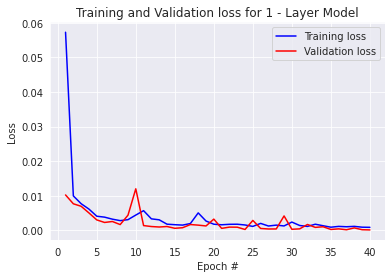

In [43]:
sns.set_style("darkgrid")
epochs = range(1, len(m1_best_train_loss) + 1)

plt.figure()

#Train and validation loss
plt.plot(epochs, m1_best_train_loss, 'b', label='Training loss')
plt.plot(epochs, m1_best_val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title('Training and Validation loss for 1 - Layer Model')
plt.legend()

plt.show()

### Extracting train and validation loss values for visualization

In [44]:
m2_best_train_loss = []
for loss_value in m2_loss_values:
  for key, value in loss_value.items():
      if key == pos[1]:
        m2_best_train_loss = value
        break;

m2_best_val_loss = []
for loss_value in m2_val_loss_values:
  for key, value in loss_value.items():
      if key == pos[1]:
        m2_best_val_loss = value
        break;


## Visualising the train and validation loss in 2 - Layer Model with best hyper-parameter settings

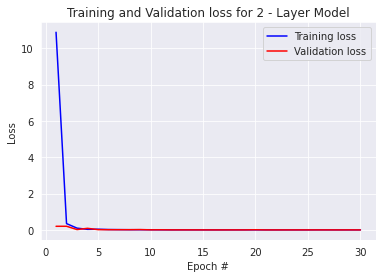

In [45]:
sns.set_style("darkgrid")
epochs = range(1, len(m2_best_train_loss) + 1)

plt.figure()

#Train and validation loss
plt.plot(epochs, m2_best_train_loss, 'b', label='Training loss')
plt.plot(epochs, m2_best_val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title('Training and Validation loss for 2 - Layer Model')
plt.legend()

plt.show()

### Extracting train and validation loss values for visualization

In [46]:
m3_best_train_loss = []
for loss_value in m3_loss_values:
  for key, value in loss_value.items():
      if key == pos[2]:
        m3_best_train_loss = value
        break;

m3_best_val_loss = []
for loss_value in m3_val_loss_values:
  for key, value in loss_value.items():
      if key == pos[2]:
        m3_best_val_loss = value
        break;


## Visualising the train and validation loss in 3 - Layer Model with best hyper-parameter settings

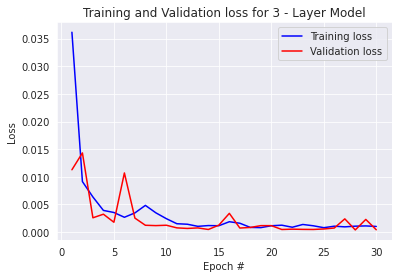

In [47]:
sns.set_style("darkgrid")
epochs = range(1, len(m3_best_train_loss) + 1)

plt.figure()

#Train and validation loss
plt.plot(epochs, m3_best_train_loss, 'b', label='Training loss')
plt.plot(epochs, m3_best_val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title('Training and Validation loss for 3 - Layer Model')
plt.legend()

plt.show()

In [73]:
data = {'Hidden Layers' : [1,2,3], 'No of Epochs' : [40,30,30], 'Learning Rate' : [0.01,0.1,0.01] , 'Activation' : ['relu','relu','relu'], 'Regularization' : None,'Train Loss' : [m1_best_train_loss[-1], m2_best_train_loss[-1], m3_best_train_loss[-1]] , 'Test RMSE' : min}
index = ['Best Model - 1', 'Best Model - 2', 'Best Model - 3']
tab = pd.DataFrame(data, index=index)
tab.head()

,Hidden Layers,No of Epochs,Learning Rate,Activation,Regularization,Train Loss,Test RMSE
Best Model - 1,1,40,0.01,relu,None,0.000877,0.012005
Best Model - 2,2,30,0.10,relu,None,0.000958,0.012929
Best Model - 3,3,30,0.01,relu,None,0.001012,0.017833


## These are the top Models each for Different Number of layers with the best test RMSE scores and optimal hyper-parameters

# Comment on hyper-parameters :

**1. No of Epochs :** 
2 out of the top 3 models required 30 epochs, therefore any number of epochs around 30 should be sufficient to get the best results.

**2. Learning Rate :**
2 out of the top 3 models gave very good training and testing results with learning rate set to 0.01 therefore learning rate of 0.01 would be optimal.

**3. Activation :**
All the top 3 models gave best results with **ReLU** set as activation function.

**4. Regularisation :**
None of the models required any sort of regularisation, the reason could be that none of the models originally would be overfitting therefore regularisation wasn't required.

**5. Hidden Layers :**
As seen above that adding more layers and neurons doesn't affect our test metric (RMSE) much and going by the simple and compact model philosophy 1 Hidden Layer is enough for this dataset.

**Therefore the best model with the most optimal hyper-parameters should be the one with :** <br>
***Epochs = 30*** <br>
***Learning Rate = 0.0.1*** <br>
***Activation = ReLU*** <br>
***Regularisation = None*** <br>
***Hidden Layers = 1***

## Testing a model with the most optimal settings as mentioned above

2/2 - 0s - loss: 9.9111e-04 - rmse: 0.0315 - 18ms/epoch - 9ms/step


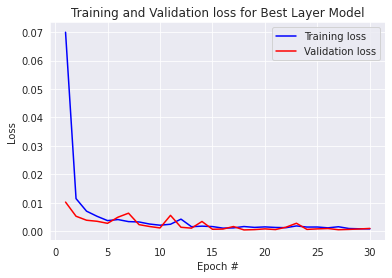

╒═════════════════╤════════════════╤═════════════════╤═════════════╤══════════════════╤══════════════╤═════════════╕
│   Hidden Layers │   No of Epochs │   Learning Rate │ Activtion   │ Regularization   │   Train Loss │   Test RMSE │
╞═════════════════╪════════════════╪═════════════════╪═════════════╪══════════════════╪══════════════╪═════════════╡
│               1 │             30 │            0.01 │ relu        │ None             │  0.000847823 │   0.0314819 │
╘═════════════════╧════════════════╧═════════════════╧═════════════╧══════════════════╧══════════════╧═════════════╛


In [96]:
from tabulate import tabulate
## Testing out a model with the above settings
train_val , test_val, loss, val_loss = One_Layer_Model(epochs = 30, lr = 0.01, activation = 'relu', reg = None)

for key, value in loss.items():
  train_loss = value

for key, value in val_loss.items():
  valid_loss = value

for key, value in test_val.items():
  test_rmse = value

sns.set_style("darkgrid")
epochs = range(1, len(valid_loss) + 1)

plt.figure()

#Train and validation loss

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, valid_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title('Training and Validation loss for Best Layer Model')
plt.legend()

plt.show()

table = [['Hidden Layers', 'No of Epochs', 'Learning Rate', 'Activtion', 'Regularization', 'Train Loss' , 'Test RMSE'], 
         [1, 30, 0.01, 'relu', 'None', train_loss[-1] , test_rmse]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

##Viola! A simple and compact model giving a great result.